In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import math
import sklearn
from sklearn.decomposition import PCA, FastICA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS


In [2]:
train = pd.read_csv('train4.csv')
train.head(10)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,letter1_C,letter1_D,letter1_E,letter1_F,letter1_G,letter1_T,letter1_U,letter2_P,letter2_S,letter2_n
0,2.0,0.0,2,39.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
1,1.0,0.0,2,24.0,0.0,109.0,9.0,25.0,549.0,44.0,...,0,0,0,1,0,0,0,0,1,0
2,2.0,0.0,2,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,...,0,0,0,0,0,0,0,0,1,0
3,2.0,0.0,2,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,...,0,0,0,0,0,0,0,0,1,0
4,1.0,0.0,2,16.0,0.0,303.0,70.0,151.0,565.0,2.0,...,0,0,0,1,0,0,0,0,1,0
5,1.0,0.0,1,44.0,0.0,0.0,483.0,0.0,291.0,0.0,...,0,0,0,1,0,0,0,1,0,0
6,1.0,0.0,2,26.0,0.0,42.0,1539.0,3.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
7,1.0,1.0,2,28.0,0.0,0.0,0.0,0.0,0.0,NaN,...,0,0,0,0,1,0,0,0,1,0
8,1.0,0.0,2,35.0,0.0,0.0,785.0,17.0,216.0,0.0,...,0,0,0,1,0,0,0,0,1,0
9,2.0,1.0,0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0


In [3]:
train.columns[train.isna().any()].tolist()

['HomePlanet',
 'CryoSleep',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck']

In [4]:
train.HomePlanet.value_counts()

HomePlanet
1.0    4602
2.0    2131
3.0    1759
Name: count, dtype: int64

In [5]:
# ТАК КАК ЗНАЧЕНИЙ 1 В 2/2.5 РАЗА БОЛЬШЕ ОСТАЛЬНЫХ, ТО ВСЕ ПРОПУЩЕННЫЕ ЗАПОЛНЯЕМ ЗНАЧЕНИЯМИ 1 
train['HomePlanet'].fillna(1, inplace=True)

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

features = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# с пропущенными значениями
missing_values_df = train[train[features].isnull().any(axis=1)]

# без пропущенных значений
training_data = train.dropna(subset=features)

X_train = training_data.drop(features, axis=1)
y_train = training_data[features]

# использую IterativeImputer для заполнения пропущенных значений
imputer = IterativeImputer(max_iter=10, random_state=0)
imputed_data = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)


model = LinearRegression()
model.fit(imputed_data, y_train)

missing_values_df[features] = model.predict(imputer.transform(missing_values_df.drop(features, axis=1)))

train = pd.concat([training_data, missing_values_df])

train

/Users/anastasiavinogradskaa/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/var/folders/_z/dxjw6bsj42vd1dd7jll9syv40000gn/T/ipykernel_16553/22462247.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_values_df[features] = model.predict(imputer.transform(missing_values_df.drop(features, axis=1)))


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,letter1_C,letter1_D,letter1_E,letter1_F,letter1_G,letter1_T,letter1_U,letter2_P,letter2_S,letter2_n
0,2.0,0.0,2,39.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,1,0,0
1,1.0,0.0,2,24.0,0.0,109.000000,9.000000,25.000000,549.000000,44.000000,...,0,0,0,1,0,0,0,0,1,0
2,2.0,0.0,2,58.0,1.0,43.000000,3576.000000,0.000000,6715.000000,49.000000,...,0,0,0,0,0,0,0,0,1,0
3,2.0,0.0,2,33.0,0.0,0.000000,1283.000000,371.000000,3329.000000,193.000000,...,0,0,0,0,0,0,0,0,1,0
4,1.0,0.0,2,16.0,0.0,303.000000,70.000000,151.000000,565.000000,2.000000,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8642,1.0,1.0,2,21.0,0.0,51.805378,-720.339757,-168.434651,121.470222,122.130600,...,0,0,0,0,1,0,0,1,0,0
8643,3.0,1.0,2,50.0,0.0,251.501560,-348.466821,151.404615,-244.077148,-342.790861,...,0,0,0,1,0,0,0,0,1,0
8665,1.0,1.0,2,33.0,0.0,80.717037,-667.375449,-195.097882,209.067722,144.296702,...,0,0,0,0,1,0,0,0,1,0
8667,2.0,0.0,2,29.0,0.0,220.730013,743.828593,423.982442,-10.629069,-18.029249,...,0,0,1,0,0,0,0,1,0,0


In [7]:
train.columns[train.isna().any()].tolist()

['CryoSleep', 'Age', 'VIP']

In [8]:
# ПРОПУЩЕННЫЕ age ЗАПОЛНЯЮ СРЕДНИМИ 
mean_age = train['Age'].mean()

train['Age'].fillna(mean_age, inplace=True)

In [9]:
train.columns[train.isna().any()].tolist()

['CryoSleep', 'VIP']

In [10]:
transported = train[train['Transported'] == 1]
not_transported = train[train['Transported'] == 0]

print ("Transported: %i (%.1f%%)"%(len(transported), (len(transported))/len(train)*100.0))
print ("Not Transported: %i (%.1f%%)"%(len(not_transported), (len(not_transported))/len(train)*100.0))
print ("Total: %i"%len(train))

Transported: 4378 (50.4%)
Not Transported: 4315 (49.6%)
Total: 8693


In [11]:
train.groupby('VIP').Transported.value_counts()

VIP  Transported
0.0  1              4198
     0              4093
1.0  0               123
     1                76
Name: count, dtype: int64

In [12]:
train[['VIP', 'Transported']].groupby('VIP', as_index = False).mean()

,VIP,Transported
0,0.0,0.506332
1,1.0,0.381910


/var/folders/_z/dxjw6bsj42vd1dd7jll9syv40000gn/T/ipykernel_16553/1925662381.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='VIP', y='Transported', data=train, ci=None)


<Axes: xlabel='VIP', ylabel='Transported'>

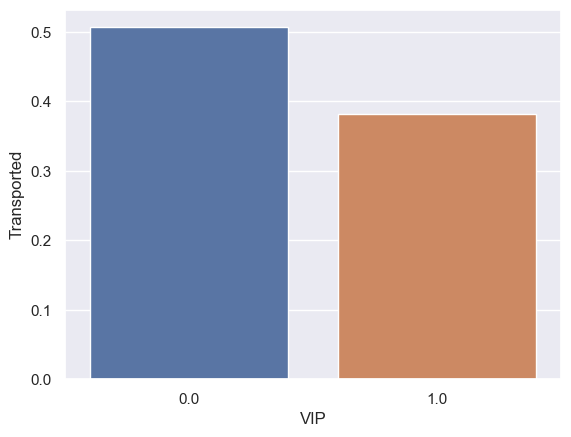

In [13]:
sns.barplot(x='VIP', y='Transported', data=train, ci=None)

In [14]:
train[['CryoSleep', 'Transported']].groupby('CryoSleep', as_index = False).mean()

,CryoSleep,Transported
0,0.0,0.328921
1,1.0,0.817583


/var/folders/_z/dxjw6bsj42vd1dd7jll9syv40000gn/T/ipykernel_16553/1204611779.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='CryoSleep', y='Transported', data=train, ci=None)


<Axes: xlabel='CryoSleep', ylabel='Transported'>

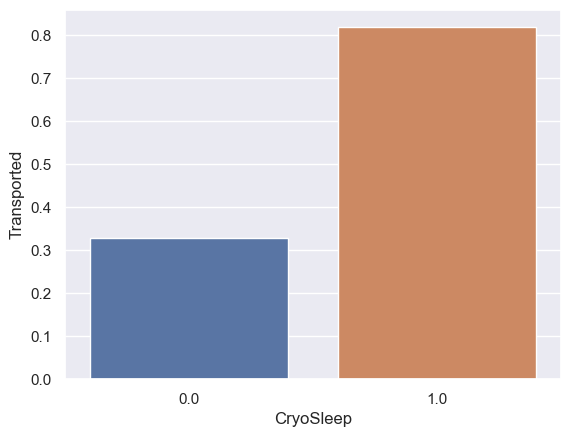

In [15]:
sns.barplot(x='CryoSleep', y='Transported', data=train, ci=None)

In [16]:
train.VIP.value_counts()

VIP
0.0    8291
1.0     199
Name: count, dtype: int64

In [17]:
train['VIP'].fillna(0, inplace=True)

In [18]:
train.columns[train.isna().any()].tolist()

['CryoSleep']

In [19]:
train.CryoSleep.value_counts()

CryoSleep
0.0    5439
1.0    3037
Name: count, dtype: int64

In [20]:
def fill_nan_with_lr(train, column):
    features = train.drop([column, 'Transported'], axis=1)
    not_nan_indices = train[~train[column].isna()].index

    lr = LinearRegression()
    lr.fit(features.loc[not_nan_indices], train.loc[not_nan_indices, column])

    nan_indices = train[train[column].isna()].index
    predictions = lr.predict(features.loc[nan_indices])
    train.loc[nan_indices, column] = predictions

    return train

train = fill_nan_with_lr(train, 'CryoSleep')

In [21]:
train.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
letter1_A       0
letter1_B       0
letter1_C       0
letter1_D       0
letter1_E       0
letter1_F       0
letter1_G       0
letter1_T       0
letter1_U       0
letter2_P       0
letter2_S       0
letter2_n       0
dtype: int64